In [1]:
## load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline 

## matplotlib is a library that generates plots 
## https://matplotlib.org/tutorials/index.html

In [2]:
## pandas is a library that helps with data analysis 
## https://pandas.pydata.org/ 
## you can read in "dataframes" which are generalized tables of data 

## read in data from file "convergence_analysis.csv" into dataframe df
df = pd.read_csv("convergence_analysis.csv") 

## show top of dataframe df
df.head()

,encut,kpoint,energy
0,200,2,-300
1,200,3,-400
2,200,4,-200
3,200,5,-500
4,300,2,-800


In [3]:
## find all unique values of encut and save in list "encut"
encuts=df.encut.unique()
print(encuts)

## find all unique values of kpoint and save in list "kpoint"
kpoints=df.kpoint.unique()
print(kpoints)

[200 300 400]
[2 3 4 5]


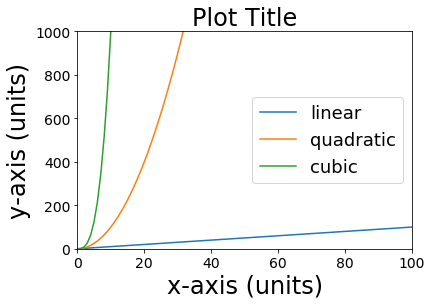

In [4]:
## Before we plot our data, let's learn some basic plotting skills using matplotlib 
## https://matplotlib.org/tutorials/introductory/pyplot.html

## generate list x = [0,1,2,...,99,100] and plot a few curves
x = np.linspace(0, 100, 101)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

## select some features of the plot 
plt.xlim(0,100)
plt.ylim(0,1000)
plt.title("Plot Title", fontsize=24)
plt.xlabel("x-axis (units)", fontsize=24)
plt.ylabel("y-axis (units)", fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
plt.legend(loc='center right',fontsize=18)

## save your plot as a pdf 
plt.savefig('filename.pdf',bbox_inches='tight')

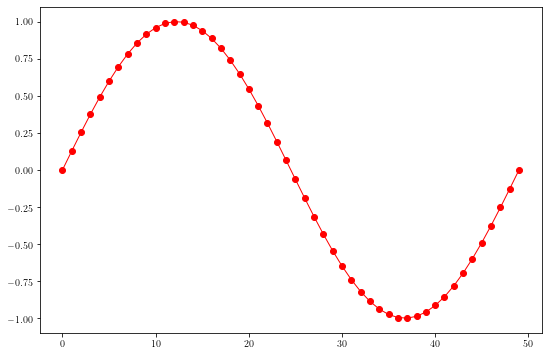

In [5]:
## you can use the dictionary rcParams to modify the global plot style directly
## if you set rc parameters, all plots will by default use thesse settings 
## (there are also several predefined plot styles you can load and use)
## https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html 

from pylab import rcParams

## so that we can edit in Adobe Illustrator later if needed: 
plt.rcParams['pdf.fonttype'] = 42

## set default figure size 
## rcParams['figure.figsize'] = 9,6

## you can select fonts from LaTeX family if you want 
## https://matplotlib.org/3.1.1/tutorials/text/usetex.html
plt.rc('text',usetex=True)
plt.rc('mathtext',fontset='cm')
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':14})
#plt.rc('font',**{'family':'serif','serif':['Helvetica']})

## set default linewidth and legend font size 
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=12)

plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')

## note: after you run this cell, every plot you generate from here 
## onwards will use the global settings you have set using rc

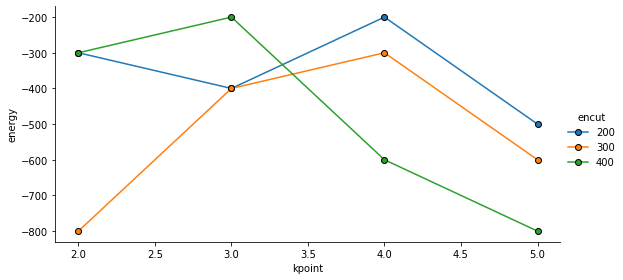

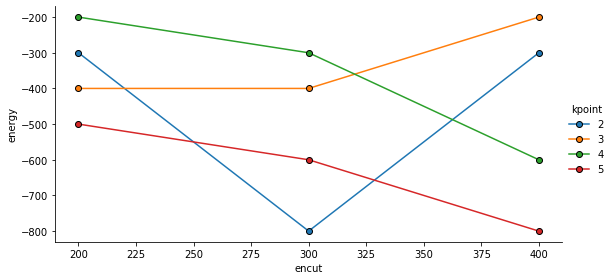

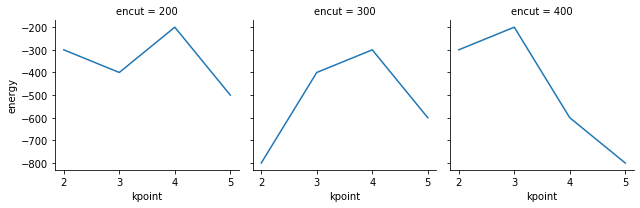

In [9]:
## use seaborn to plot energy vs. kpoint
## there are many nice examples of seaborn here:
## https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 

#sns.set(style="ticks") 

## use FacetGrid to 'facet' your data set by the value of encut  
## make plot of energy vs. kpoints for different values of encut 
g = sns.FacetGrid(data=df, hue='encut', height=4, aspect=2)
g.map(plt.plot,'kpoint','energy',marker = 'o',mew=1,mec='k')
g.add_legend()

## use seaborn to plot energy vs. encut
g = sns.FacetGrid(data=df, hue='kpoint', height=4, aspect=2)
g.map(plt.plot, 'encut','energy', marker = 'o', mew=1, mec='k')
g.add_legend()

## make a grid of plots showing your results
g = sns.FacetGrid(data=df, col="encut", height=3, aspect=1)
g = g.map(plt.plot, "kpoint","energy")

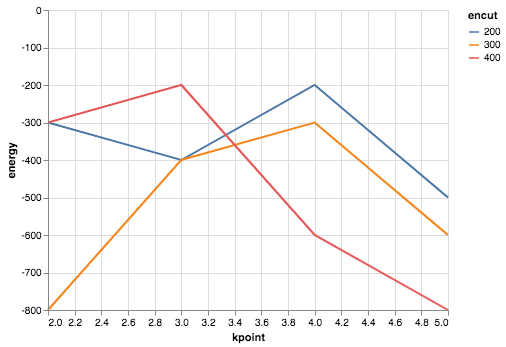

In [10]:
## altair is another option for a library to easily manipulate data and plot results
## https://altair-viz.github.io/

import altair as alt
alt.renderers.enable('notebook')

alt.Chart(df).mark_line().encode(
    x='kpoint:Q',
    y='energy:Q',
    color='encut:N'
)